<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt

**Load the adults income dataset and print first five observations**

In [4]:
ad=pd.read_csv('adult_income.csv')
ad.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null int64
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
ad.age.groupby(ad.sex).mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
ad['capital.gain'].quantile(0.95)

5013.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
ad.education.value_counts().head(1)

HS-grad    10501
Name: education, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
ad.age.groupby(ad.workclass).median()

workclass
?                   35
Federal-gov         43
Local-gov           41
Never-worked        18
Private             35
Self-emp-inc        45
Self-emp-not-inc    44
State-gov           39
Without-pay         57
Name: age, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from scipy import stats

In [36]:
ad['capital.gain'].mean()

1077.6488437087312

In [43]:
stats.trim_mean(ad['capital.gain'],proportiontocut=0.01)

493.7085331077058

In [ ]:
# Outliers are present in the datas hence both of the means differs.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
ad[ad['race']=='Asian-Pac-Islander'].count()[0]/ad['race'].count()*100

3.190933939375326

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
ad.groupby(ad.occupation)['hours.per.week'].sum()[
ad.groupby(ad.occupation)['hours.per.week'].sum().max()==ad.groupby(ad.occupation)['hours.per.week'].sum()].index[0]

'Exec-managerial'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
ad['hours.per.week'].quantile(0.75)-ad['hours.per.week'].quantile(0.25)

5.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [163]:
ad.cov()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
age,186.061400,-1.103507e+05,1.281849,-0.570114,7.824819e+03,317.560742,11.684268
fnlwgt,-110350.685300,1.114080e+10,-11729.527298,-1333.822718,3.366625e+05,-436030.333167,-24827.440684
education.num,1.281849,-1.172953e+04,6.618890,-0.014865,2.330008e+03,82.856445,4.723030
sex,-0.570114,-1.333823e+03,-0.014865,0.221376,-1.684584e+02,-8.639360,-1.331696
capital.gain,7824.818537,3.366625e+05,2330.007877,-168.458406,5.454254e+07,-94085.760688,7156.618397
capital.loss,317.560742,-4.360303e+05,82.856445,-8.639360,-9.408576e+04,162376.937814,270.487338
hours.per.week,11.684268,-2.482744e+04,4.723030,-1.331696,7.156618e+03,270.487338,152.737002


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
ad.occupation.value_counts(normalize=True)*100

Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
?                     5.660146
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
def plot_figure(d):
    plt.bar(d.value_counts().index,d.value_counts().values)
    print(d.value_counts().nlargest(1))
    plt.show()

White    27816
Name: race, dtype: int64


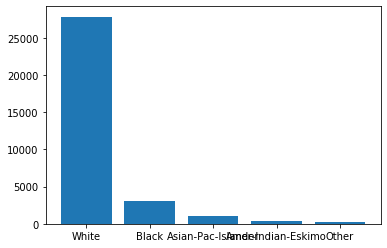

In [20]:
pl
plot_figure(ad['race'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

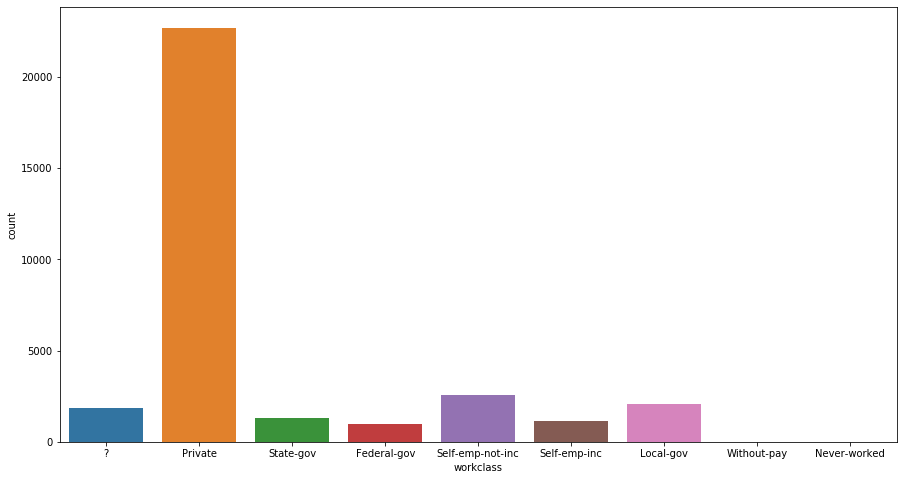

In [61]:
plt.figure(figsize=(15,8))
ad.workclass.mode()[0]
sns.countplot(ad.workclass)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
ad['hours.per.week'].mode()[0]


40

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
ad.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

In [ ]:
# Yes there is a negative skew at education.num column 

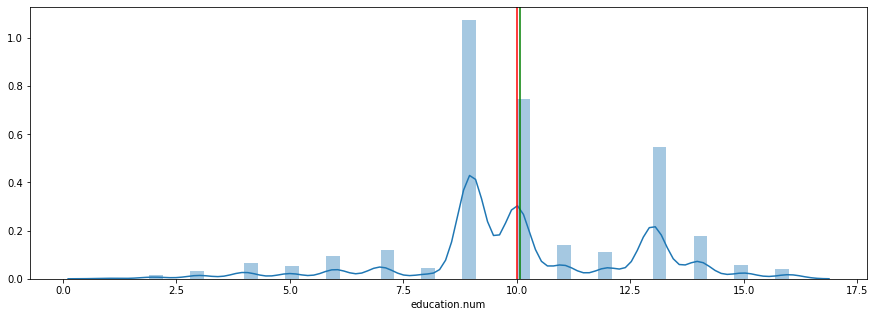

In [158]:
plt.figure(figsize=(15,5))
sns.distplot(ad['education.num'])
plt.axvline(ad['education.num'].mean(),color='g')
plt.axvline(ad['education.num'].median(),color='r')
plt.show()

In [165]:
# Here in this plot mean is almost equal to median but since the column is a discrete type we cannot say it is symmetric

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
ad.kurtosis()

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
sex                -1.482709
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

In [ ]:
# Here fnlwgt,capitalgain,capitalloss,hours per week are leptokurte since k>0

# education.num are mesokurte since k~0

# Sex and age column is platykurte since k<0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

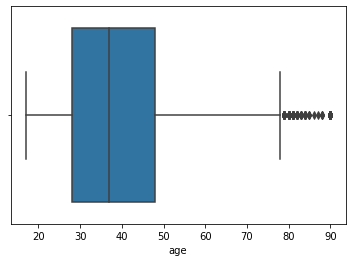

In [127]:
sns.boxplot(ad.age)
plt.show()

# Here we can see the extreme values present in the age column ranging from 78 to 90.

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

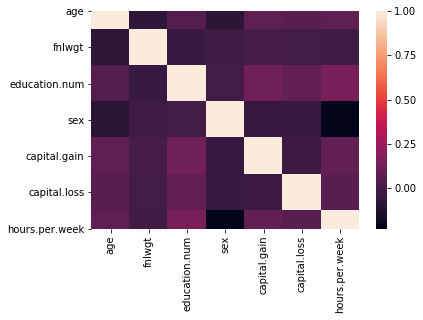

In [130]:
sns.heatmap(ad.corr())
plt.show()

# Here the correlation level between age and working hours is too low, hence there is no correlation.
# Therefore no effect of age on working hours.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
corr=ad.corr()

In [50]:
mask=np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [57]:
np.tril_indices_from(mask,-1)

(array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6],
       dtype=int64),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5],
       dtype=int64))

In [58]:
mask[np.tril_indices_from(mask,-1)]=True

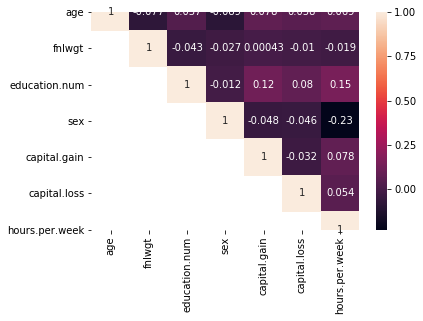

In [60]:
sns.heatmap(corr,mask=mask,annot=True)
plt.show()